In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
hotel_df = pd.read_csv("hotel_bookings.csv")

In [11]:
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


In [17]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
df = hotel_df.copy()

In [27]:
def a(var):
    a=df[var].unique()
    print(var,a)
b=['hotel','is_canceled','arrival_date_year','meal','distribution_channel','market_segment','children','customer_type','reservation_status','adults', 'children', 'babies','required_car_parking_spaces']
for i in b:
    a(i)

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
arrival_date_year [2015 2016 2017]
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
distribution_channel ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
children [ 0.  1.  2. 10.  3. nan]
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status ['Check-Out' 'Canceled' 'No-Show']
adults [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children [ 0.  1.  2. 10.  3. nan]
babies [ 0  1  2 10  9]
required_car_parking_spaces [0 1 2 8 3]


In [29]:
#Handling Null Values
df.isnull().sum().sort_values(ascending = False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

In [31]:
df[['company','agent']] = df[['company','agent']].fillna(0)

In [33]:
df.isnull().sum().sort_values(ascending = False)[:6]

country               488
children                4
hotel                   0
agent                   0
reserved_room_type      0
assigned_room_type      0
dtype: int64

In [35]:
df['children'].fillna(df['children'].mean(), inplace = True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [37]:
df['country'].fillna('Other', inplace = True)

In [39]:
df.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [41]:
#Droping duplicate values
df[df.duplicated()].shape

(31994, 32)

In [43]:
df.drop_duplicates(inplace = True)

In [45]:
df.shape

(87396, 32)

In [47]:
#Proper Datatype
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')


In [49]:
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']


In [51]:
df['total_people'] = df['adults']+df['children']+df['babies']

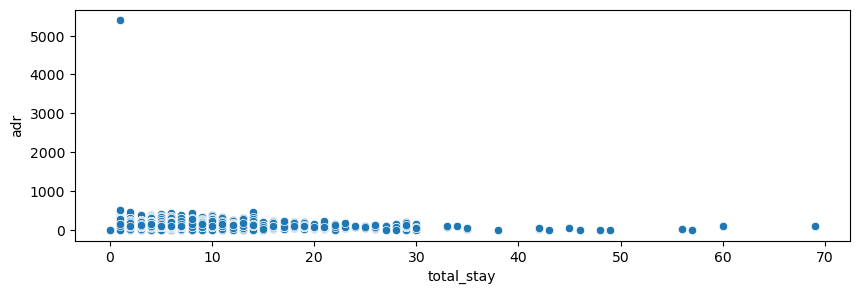

In [107]:
plt.figure(figsize = (10,3))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

In [91]:
df.columns  

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_people'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

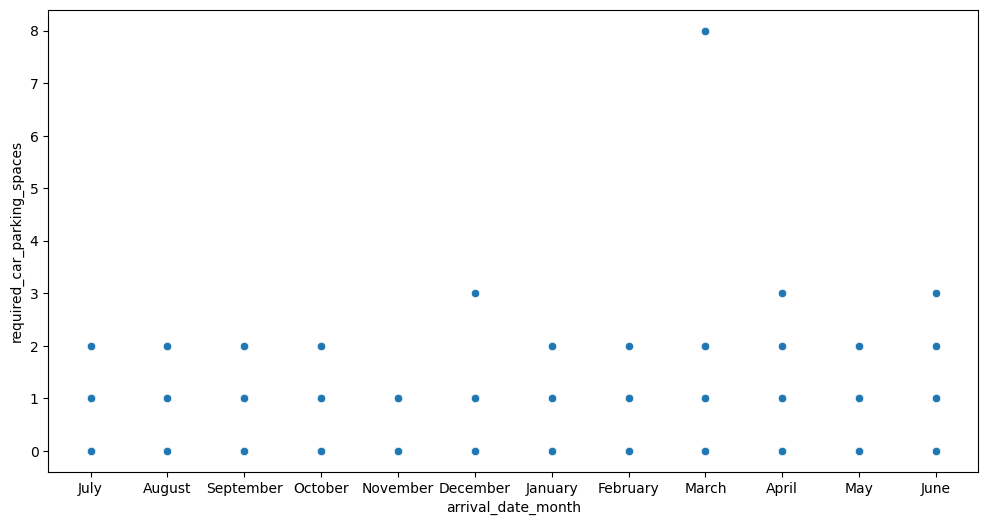

In [103]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'required_car_parking_spaces', x = 'arrival_date_month', data = df)
plt.show()

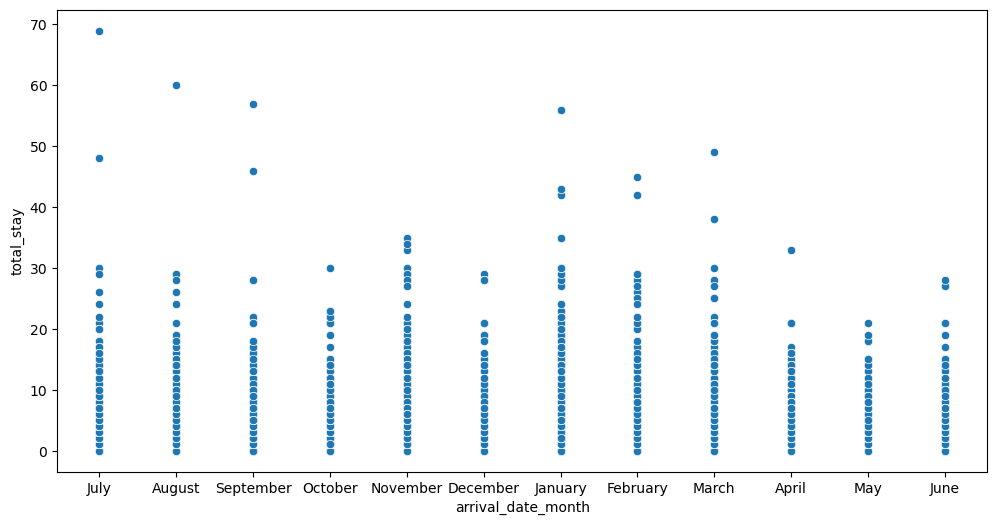

In [105]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_stay', x = 'arrival_date_month', data = df)
plt.show()

In [97]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_people'],
      dtype='object')

In [99]:
df.head()  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2,2


In [111]:
#Removing Outlier
df.drop(df[df['adr'] > 5000].index, inplace = True)


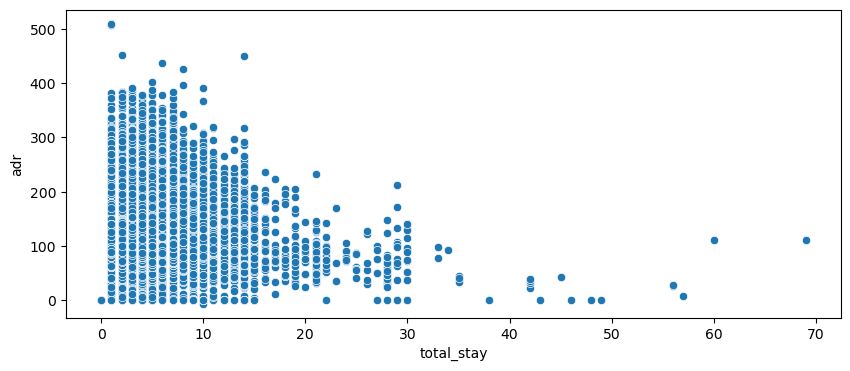

In [113]:
plt.figure(figsize = (10,4))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

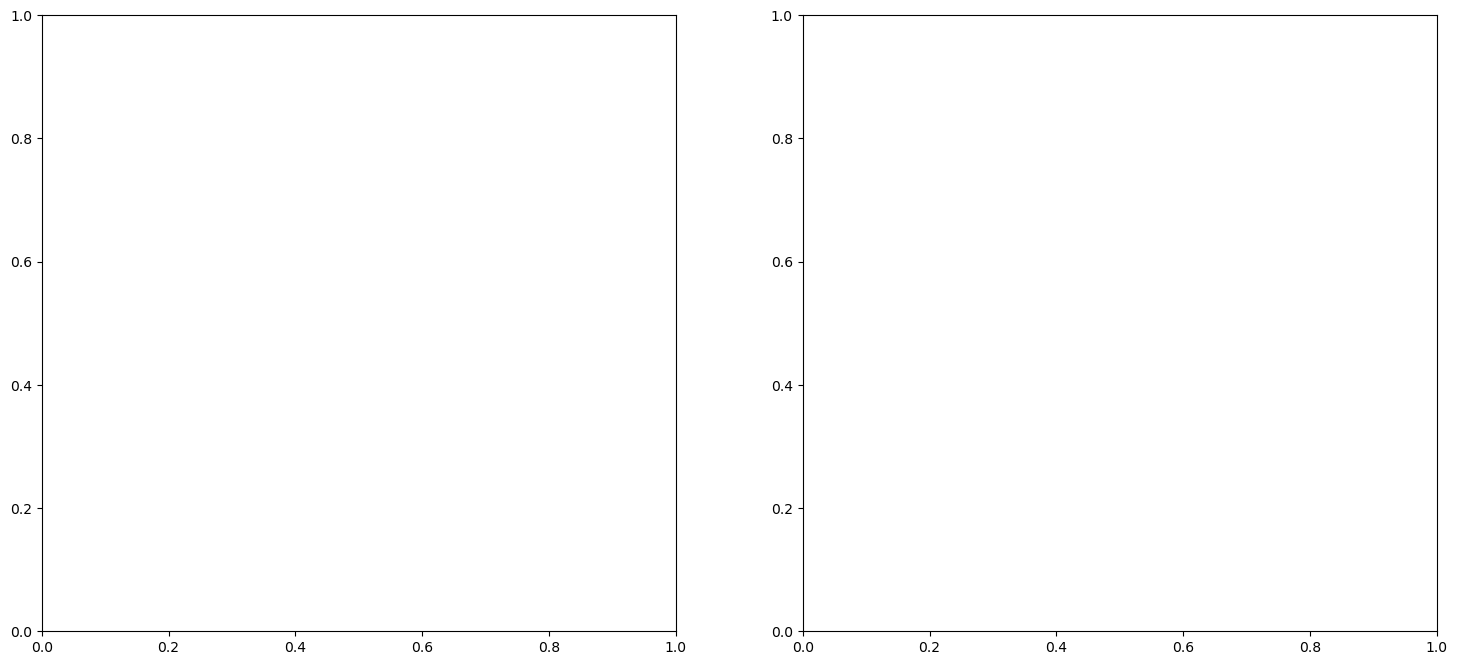

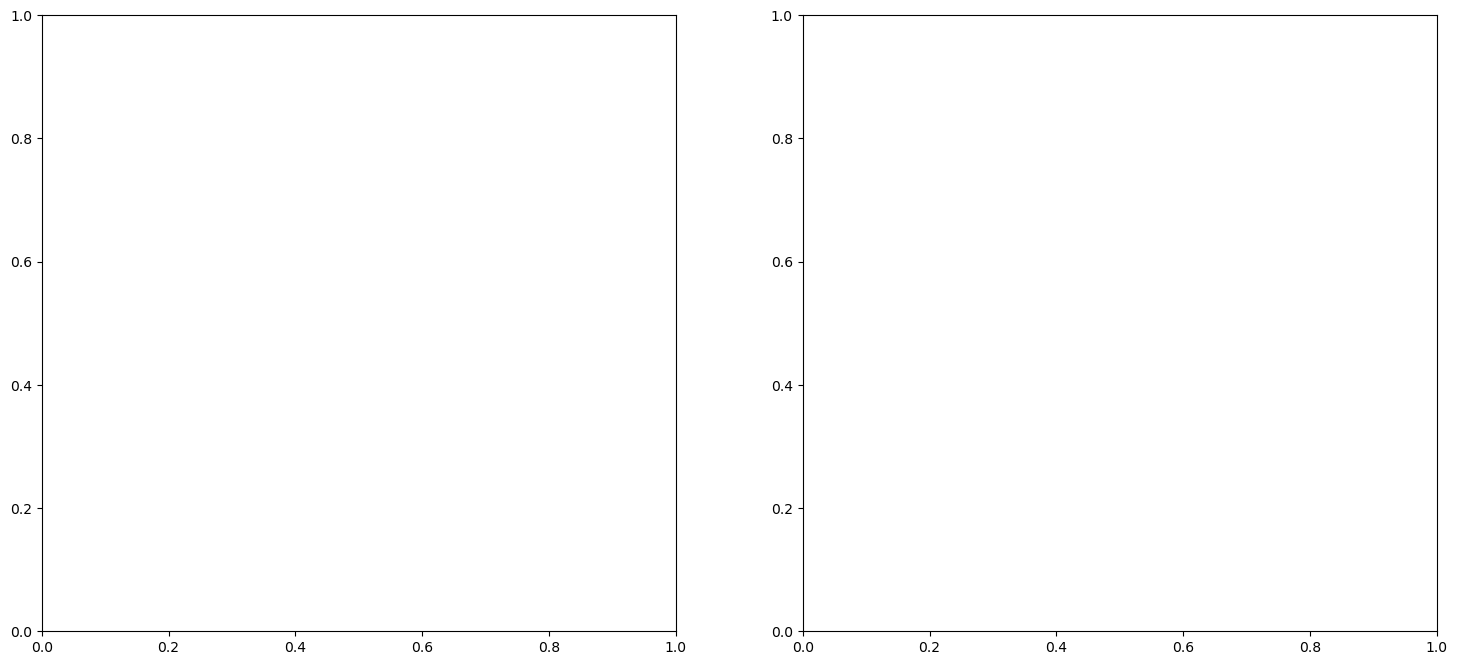

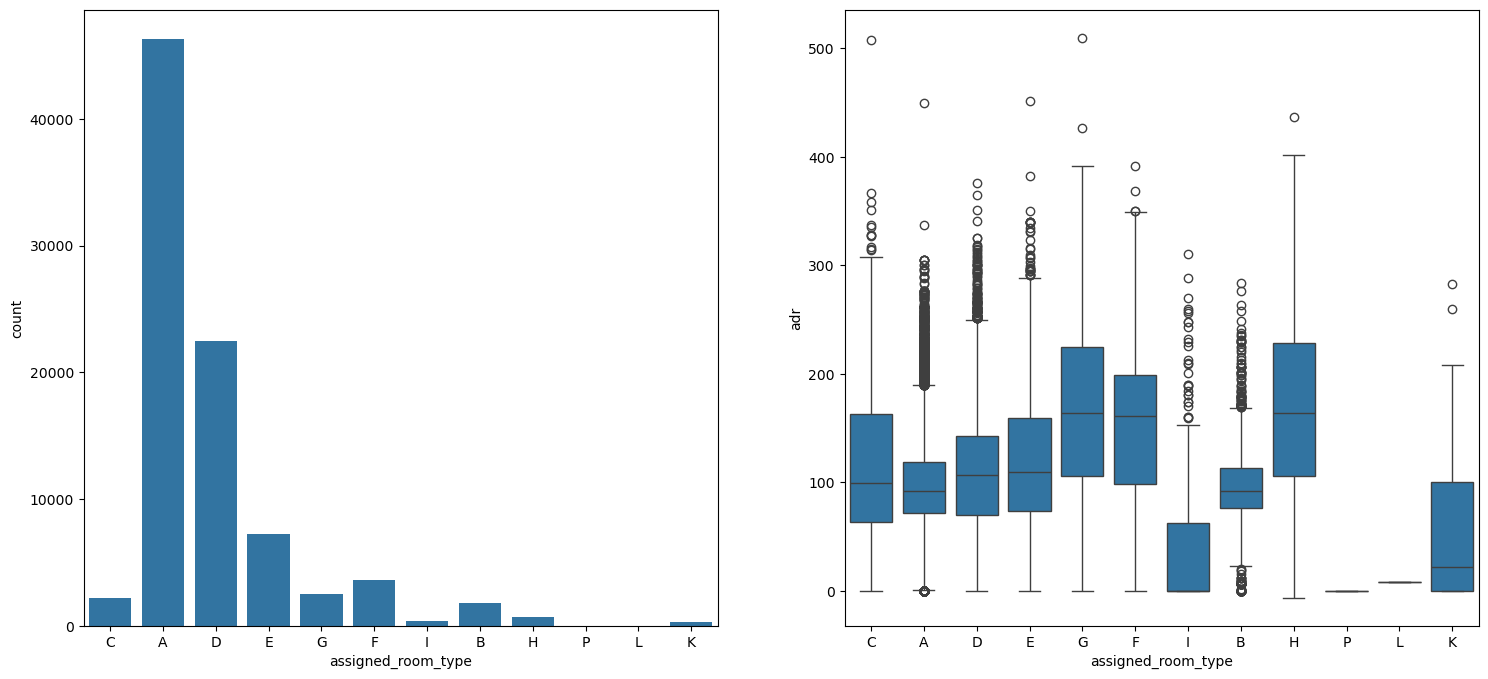

In [161]:
d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()

<Figure size 1000x500 with 0 Axes>

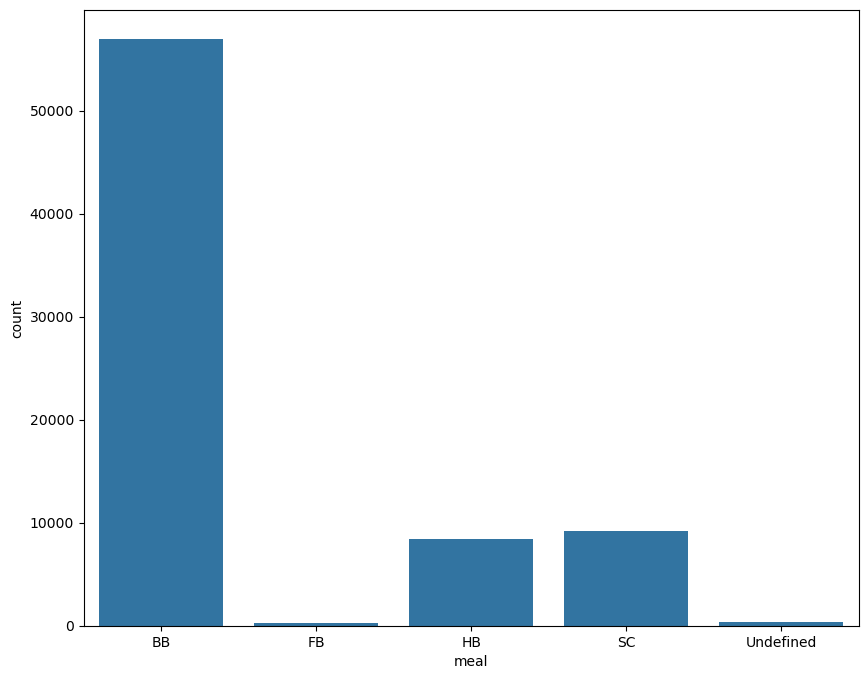

In [167]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df['meal'])
plt.show()

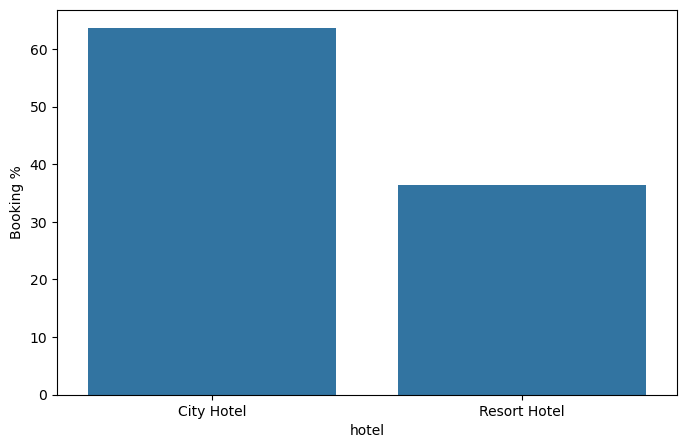

In [173]:
#which hotel have more booking
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

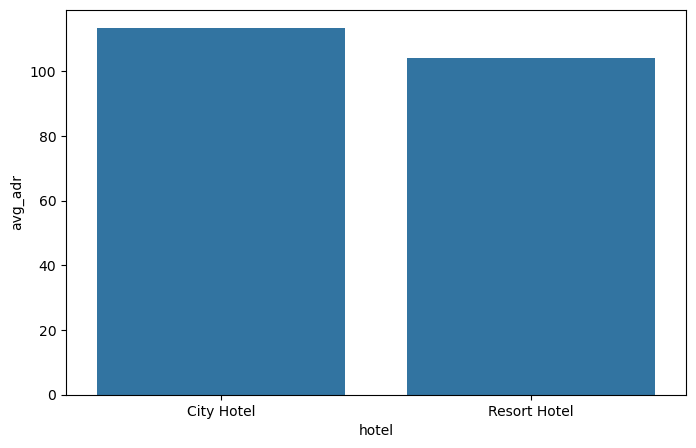

In [175]:
#which hotel have more revenu
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

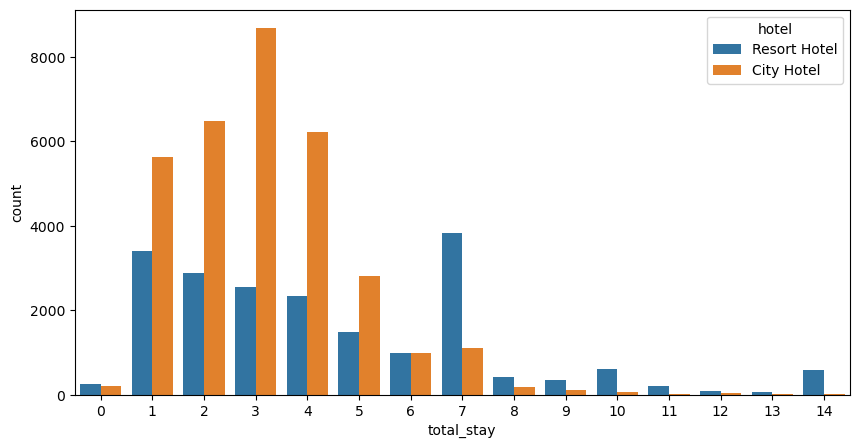

In [177]:
#which hotel has more stay
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

In [187]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D2,D1], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_bookings,total_cancelled_bookings,cancel_%
hotel,,,
City Hotel,47840,15217,31.81
Resort Hotel,27362,7250,26.50


<Figure size 1000x500 with 0 Axes>

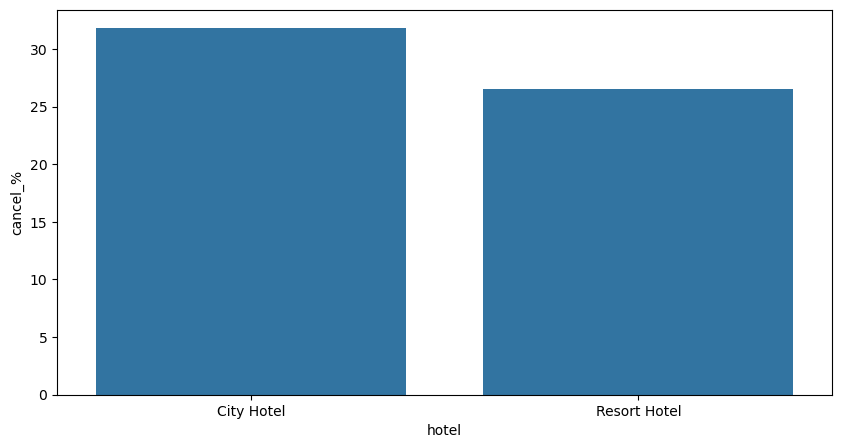

In [191]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

<Figure size 800x800 with 0 Axes>

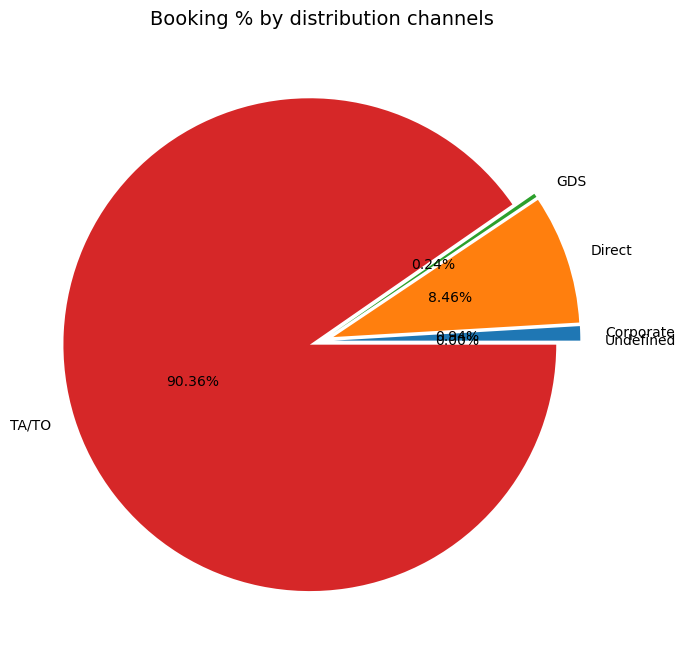

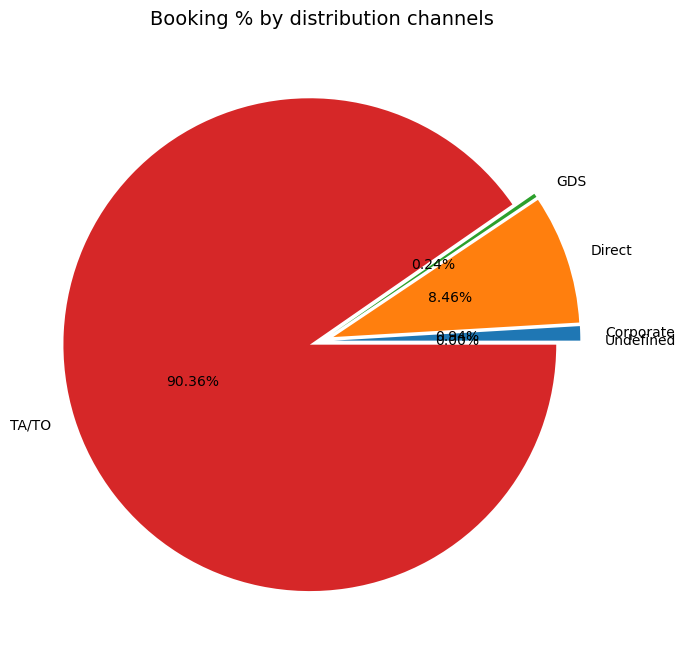

In [197]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);
plt.show()

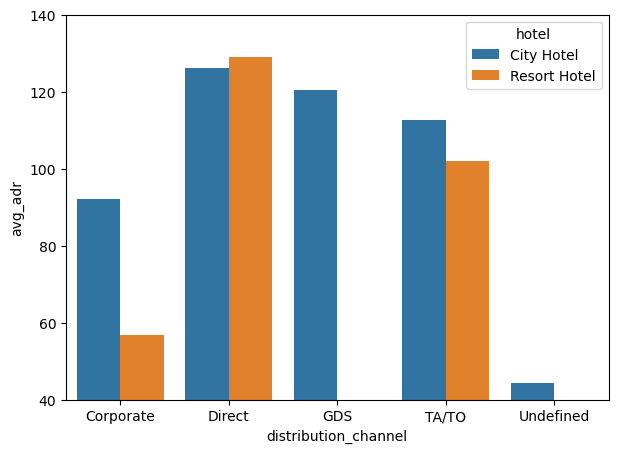

In [199]:
#hotel generating income
group_by_dc_hotel = df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

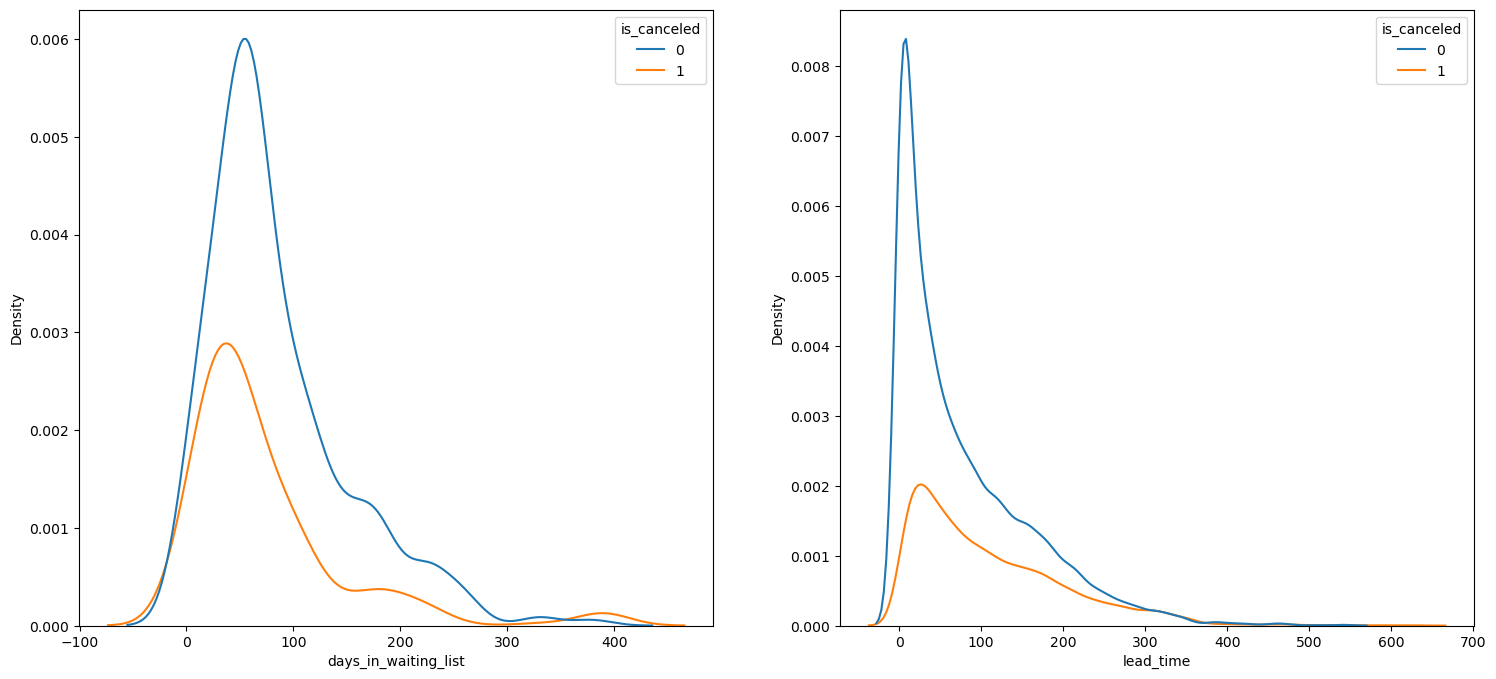

In [203]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

In [207]:
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df)

fig = plt.gcf()
fig.set_size_inches(15,10)

In [209]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_people'],
      dtype='object')

In [211]:
df['deposit_type']

3         No Deposit
4         No Deposit
7         No Deposit
8         No Deposit
9         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 75202, dtype: object

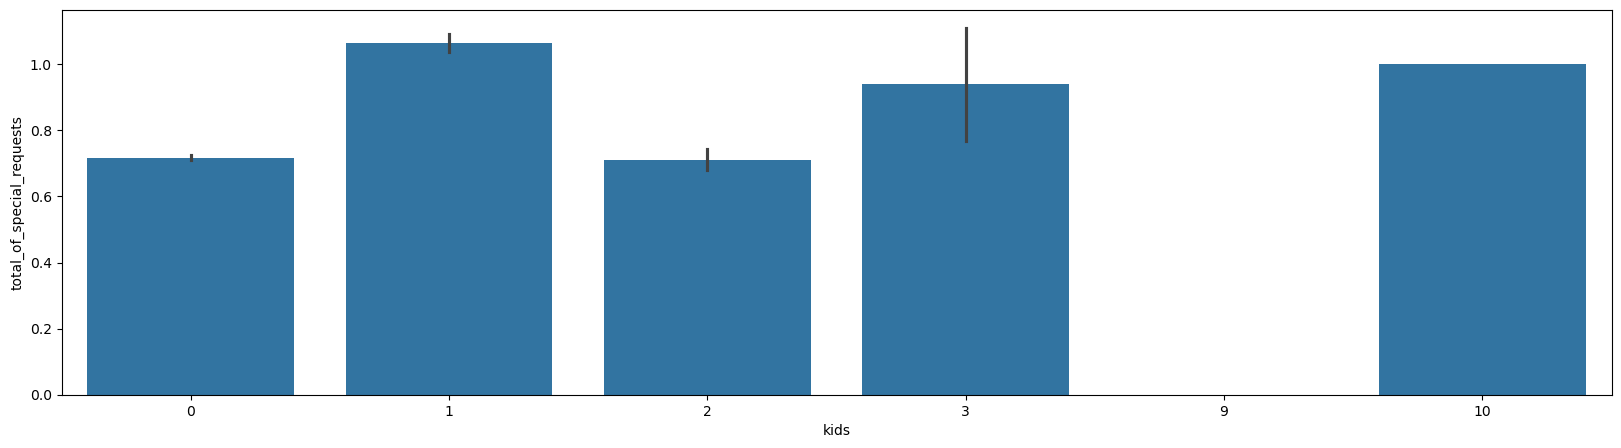

In [229]:
df['kids'] = df['children']+df['babies']
sns.barplot(x="kids", y="total_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

In [215]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,7/3/2015,2,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,0,Transient,103.00,0,1,Check-Out,7/3/2015,2,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,0,Transient,82.00,0,1,Canceled,5/6/2015,3,2
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,0,Transient,105.50,0,0,Canceled,4/22/2015,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,9/6/2017,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,9/7/2017,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,9/7/2017,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,9/7/2017,7,2


In [233]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,kids
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,7/3/2015,2,2,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,7/3/2015,2,2,0
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,0,Transient,145.0,0,0,Check-Out,7/5/2015,4,2,0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,Transient,97.0,0,3,Check-Out,7/5/2015,4,2,0


In [239]:
num_df1 = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


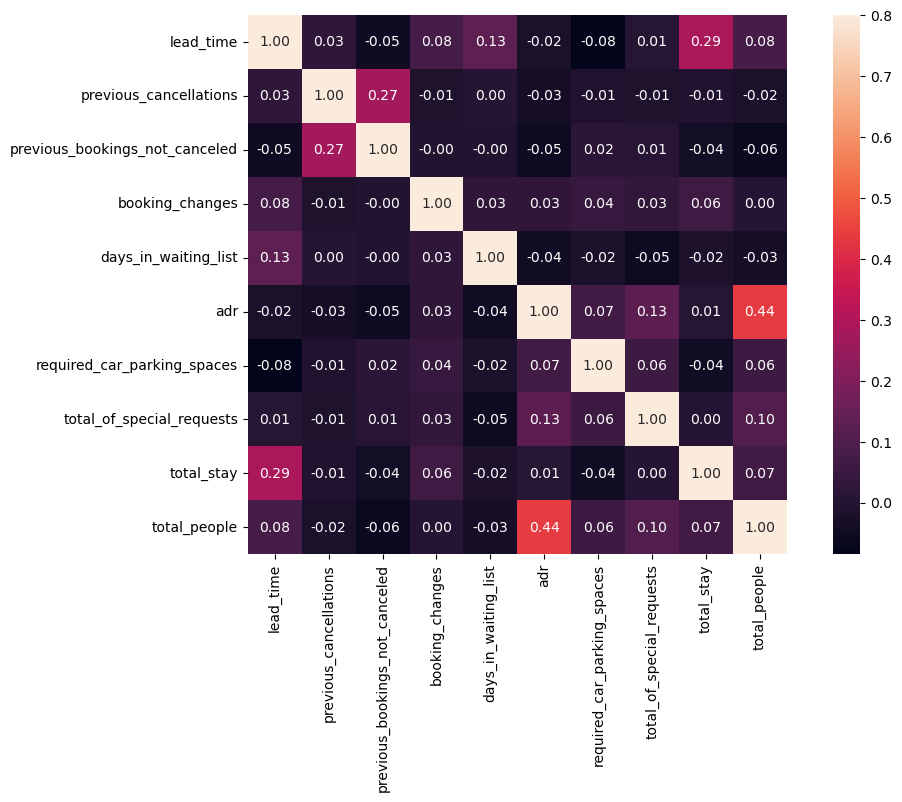

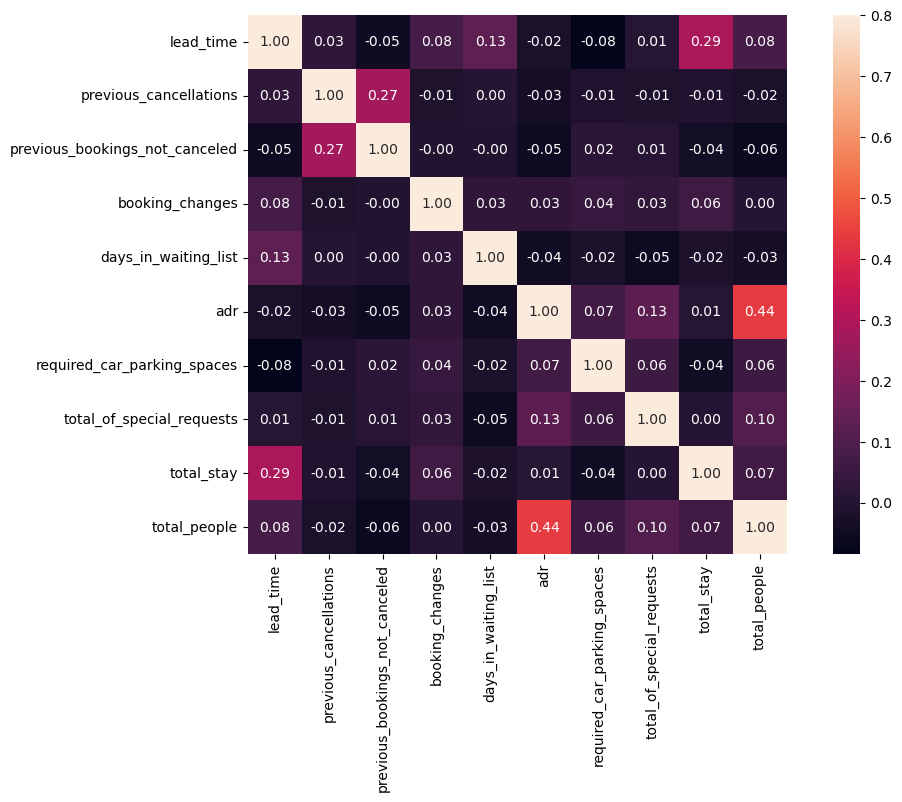

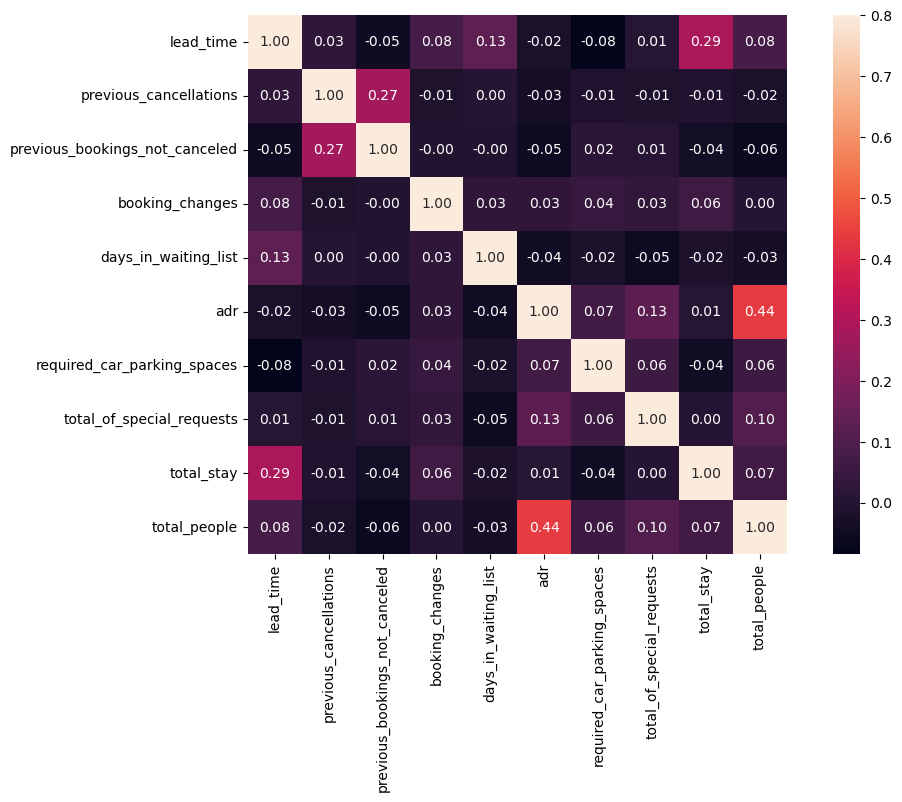

In [247]:
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);
plt.show()

In [53]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [55]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,7/3/2015,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,9/6/2017,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,9/7/2017,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,9/7/2017,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,9/7/2017,7,2


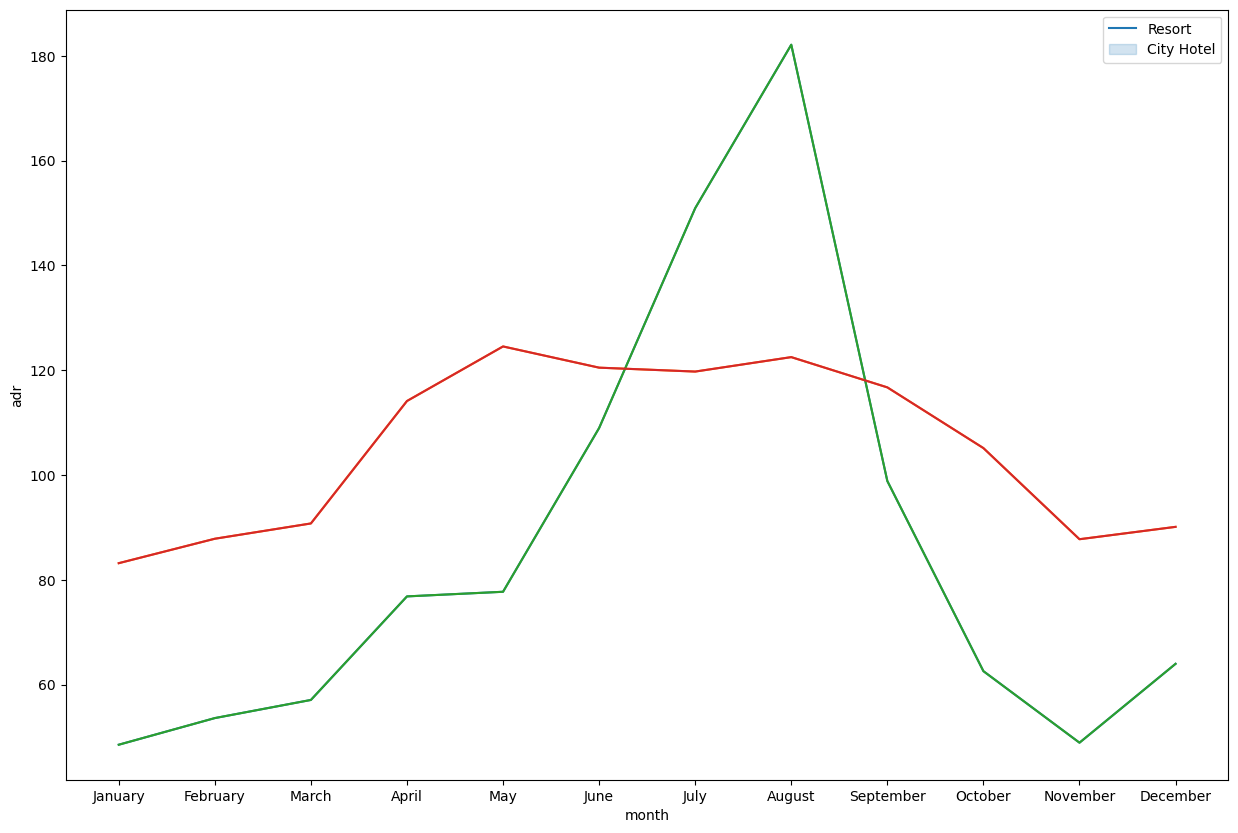

In [59]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

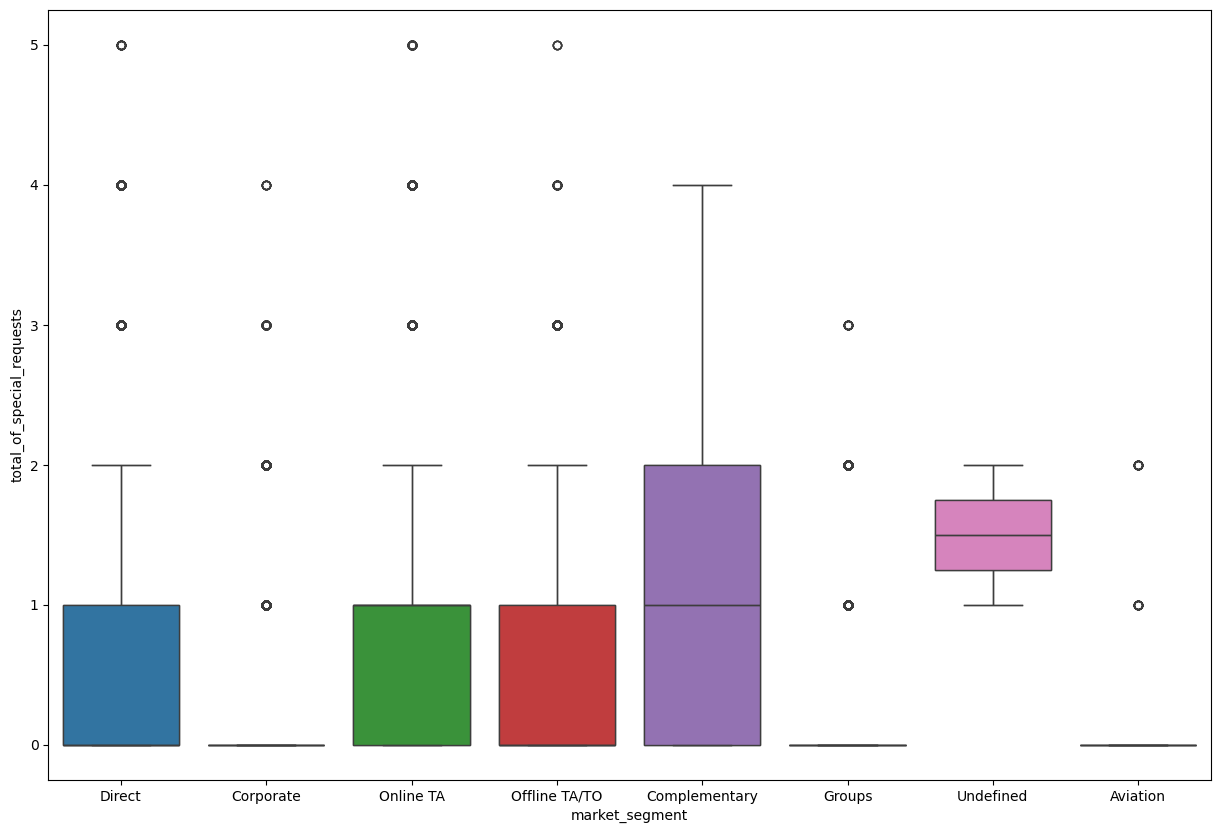

In [65]:
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df)

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

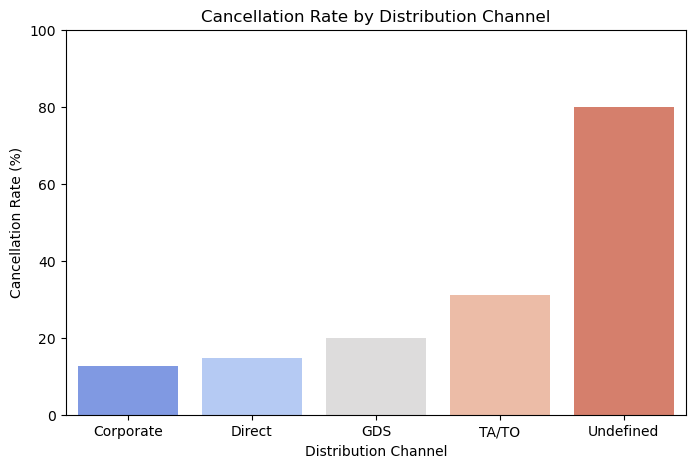

In [67]:
df['cancellation_rate'] = df.groupby('distribution_channel')['is_canceled'].transform('mean') * 100

# Aggregate cancellation rate per distribution channel
cancel_rate_df = df.groupby('distribution_channel', as_index=False)['cancellation_rate'].mean()

# Plot the cancellation rate by distribution channel
plt.figure(figsize=(8,5))
sns.barplot(x='distribution_channel', y='cancellation_rate', data=cancel_rate_df, palette='coolwarm')

plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Distribution Channel")
plt.ylim(0, 100)
plt.show()

In [77]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,cancellation_rate
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2,14.821374
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2,14.821374
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1,14.821374
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1,12.753395
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,7/3/2015,2,2,30.968600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,9/6/2017,7,2,30.968600
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,9/7/2017,7,3,30.968600
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,9/7/2017,7,2,30.968600
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,9/7/2017,7,2,30.968600


In [71]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month



   arrival_date_month
0                   7
1                   7
2                   7
3                   7
4                   7


In [73]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

print(df[['arrival_date_month']].head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,cancellation_rate
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2,14.821374
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2,14.821374
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1,14.821374
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1,12.753395
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,7/3/2015,2,2,30.968600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,9/6/2017,7,2,30.968600
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,9/7/2017,7,3,30.968600
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,9/7/2017,7,2,30.968600
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,9/7/2017,7,2,30.968600


In [79]:
#True=Resort hotel
#False=City Hotel
df['hotel']=pd.get_dummies(df['hotel'],drop_first=True)

In [83]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,cancellation_rate
0,True,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2,14.821374
1,True,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,7/1/2015,0,2,14.821374
2,True,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1,14.821374
3,True,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1,12.753395
4,True,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,7/3/2015,2,2,30.968600
6,True,0,0,2015,7,27,1,0,2,2,...,0,Transient,107.00,0,0,Check-Out,7/3/2015,2,2,14.821374
7,True,0,9,2015,7,27,1,0,2,2,...,0,Transient,103.00,0,1,Check-Out,7/3/2015,2,2,14.821374
8,True,1,85,2015,7,27,1,0,3,2,...,0,Transient,82.00,0,1,Canceled,5/6/2015,3,2,30.968600
9,True,1,75,2015,7,27,1,0,3,2,...,0,Transient,105.50,0,0,Canceled,4/22/2015,3,2,30.968600
10,True,1,23,2015,7,27,1,0,4,2,...,0,Transient,123.00,0,0,Canceled,6/23/2015,4,2,30.968600


In [85]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,cancellation_rate
119380,False,0,44,2017,8,35,31,1,3,2,...,0,Transient,140.75,0,1,Check-Out,9/4/2017,4,2,30.968600
119381,False,0,188,2017,8,35,31,2,3,2,...,0,Transient,99.00,0,0,Check-Out,9/5/2017,5,2,14.821374
119382,False,0,135,2017,8,35,30,2,4,3,...,0,Transient,209.00,0,0,Check-Out,9/5/2017,6,3,30.968600
119383,False,0,164,2017,8,35,31,2,4,2,...,0,Transient,87.60,0,0,Check-Out,9/6/2017,6,2,30.968600
119384,False,0,21,2017,8,35,30,2,5,2,...,0,Transient,96.14,0,2,Check-Out,9/6/2017,7,2,30.968600
119385,False,0,23,2017,8,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,9/6/2017,7,2,30.968600
119386,False,0,102,2017,8,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,9/7/2017,7,3,30.968600
119387,False,0,34,2017,8,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,9/7/2017,7,2,30.968600
119388,False,0,109,2017,8,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,9/7/2017,7,2,30.968600
119389,False,0,205,2017,8,35,29,2,7,2,...,0,Transient,151.20,0,2,Check-Out,9/7/2017,9,2,30.968600


In [89]:
df['reservation_status']=pd.get_dummies(df['reservation_status'],drop_first=True)

ValueError: Columns must be same length as key

In [91]:
df.drop(columns=['reservation_status'], inplace=True)

In [93]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_stay,total_people,cancellation_rate
0,True,0,342,2015,7,27,1,0,0,2,...,0,0,Transient,0.00,0,0,7/1/2015,0,2,14.821374
1,True,0,737,2015,7,27,1,0,0,2,...,0,0,Transient,0.00,0,0,7/1/2015,0,2,14.821374
2,True,0,7,2015,7,27,1,0,1,1,...,0,0,Transient,75.00,0,0,7/2/2015,1,1,14.821374
3,True,0,13,2015,7,27,1,0,1,1,...,0,0,Transient,75.00,0,0,7/2/2015,1,1,12.753395
4,True,0,14,2015,7,27,1,0,2,2,...,0,0,Transient,98.00,0,1,7/3/2015,2,2,30.968600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,0,23,2017,8,35,30,2,5,2,...,0,0,Transient,96.14,0,0,9/6/2017,7,2,30.968600
119386,False,0,102,2017,8,35,31,2,5,3,...,0,0,Transient,225.43,0,2,9/7/2017,7,3,30.968600
119387,False,0,34,2017,8,35,31,2,5,2,...,0,0,Transient,157.71,0,4,9/7/2017,7,2,30.968600
119388,False,0,109,2017,8,35,31,2,5,2,...,0,0,Transient,104.40,0,0,9/7/2017,7,2,30.968600
